In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os.path
from saveDataset import save_data

# Helper libraries
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image

set rootpath= path of the directory containing 'image-recognition-tensorflow-master'

In [2]:
rootpath='D:\hackathon'

In [3]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [4]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
#                 if re.match('chihuahua.*', file):
                if re.match('plastic.*', file):
                        images.append(img)
                        labels.append(0)
#                 elif re.match('muffin.*', file):
                elif re.match('paper.*', file):
                        images.append(img)
                        labels.append(1)
                else:
                    images.append(img)
                    labels.append(1)
        return (np.array(images), np.array(labels))

In [5]:
def shuffle_examples(X,Y):
    dim= X.shape
    X= np.reshape(X,(X.shape[0],-1))
    Y=Y.reshape(-1,1)
    X= np.append(X, Y, axis=1)
    
    np.random.seed(0)
    np.random.shuffle(X)
    
    A=np.array([])
    
    for i in range(X.shape[1]-1):
        if i==0:
            A= np.array(X[:,i]).reshape(-1,1)
        else:
            A=np.append(A,np.array(X[:,i]).reshape(-1,1),axis=1)

    Y= np.array(X[:,X.shape[1]-1])
    
    A= np.reshape(A,dim)
    
    return A,Y
    

In [6]:
maxsize = 150, 150

In [7]:
os.chdir('D:\hackathon\image_classification')

if(os.path.exists('train_images.npy')==False):
#     (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\plastic_paper', maxsize)
#     (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\plastic_paper/test_set', maxsize)

#     (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\chihuahua-muffin', maxsize)
#     (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\chihuahua-muffin/test_set', maxsize)

    (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\small_plastic_paper', maxsize)
    (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\small_plastic_paper/test_set', maxsize)

    print(train_images.shape)
    train_images, train_labels = shuffle_examples(train_images, train_labels)
    test_images, test_labels = shuffle_examples(test_images, test_labels)
    print('here')
    data={
        'train_images': np.reshape(train_images,(train_images.shape[0],-1)),
        'train_labels':train_labels.reshape(-1,1),
        'test_images':np.reshape(test_images,(test_images.shape[0],-1)),
        'test_labels':test_labels.reshape(-1,1)
    }
    os.chdir('D:\hackathon\image_classification')
    save_data(data)
    
    
    
else:
    print('found')
    os.chdir('D:\hackathon\image_classification')
    a = np.load('train_images.npy')
    train_images=a
    a = np.load('train_labels.npy')
    train_labels=a
    print(a.shape)
    a = np.load('test_images.npy')
    test_images=a
    a = np.load('test_labels.npy')
    test_labels=a
    print(a.shape)

    train_images= np.reshape(train_images,(train_images.shape[0],maxsize[0],maxsize[1]))
    test_images= np.reshape(test_images,(test_images.shape[0],maxsize[0],maxsize[1]))
    train_labels= train_labels.reshape(train_labels.shape[0])
    test_labels= test_labels.reshape(test_labels.shape[0])



found
(140, 1)
(40, 1)


In [8]:
# class_names = ['chihuahua', 'muffin']
class_names = ['plastic', 'not_plastic']




In [9]:

print(train_images.shape)

(140, 150, 150)


In [10]:

print(train_labels.shape)

(140,)


In [11]:
print(test_images.shape)
print(test_labels)

(40, 150, 150)
[0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1
 0 1 1]


In [12]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

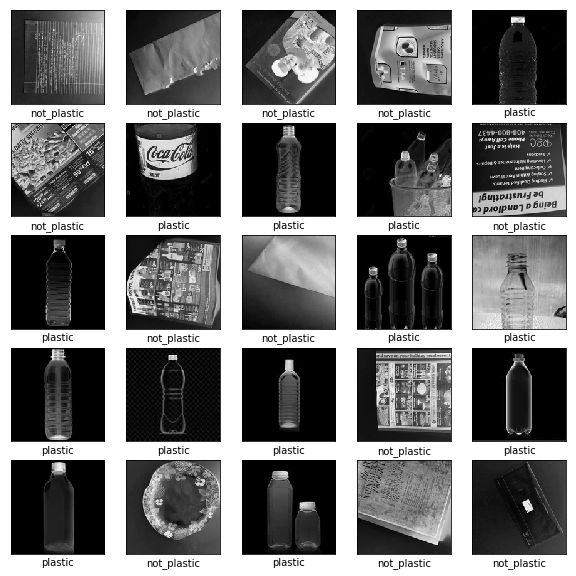

In [13]:
display_images(train_images, train_labels)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)
print(test_images.shape)

(140, 150, 150)
(40, 150, 150)


In [15]:
# Setting up the layers.

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(100, 100)),
#         keras.layers.Dense(128, activation=tf.nn.sigmoid),
#         keras.layers.Dense(16, activation=tf.nn.sigmoid),
#     keras.layers.Dense(2, activation=tf.nn.softmax)
# ])

model = keras.models.Sequential([
                keras.layers.Flatten(input_shape = ( maxsize)),
                keras.layers.Dense(512, activation=tf.nn.relu),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(16, activation=tf.nn.relu),
        keras.layers.Dense(2, activation=tf.nn.softmax)
        ])

# model = keras.models.Sequential([
#                 keras.layers.Flatten(input_shape = ( 100, 100)),
#                 keras.layers.Dense(1024, activation=tf.nn.relu),
#                 keras.layers.Dropout(0.5),
#                 keras.layers.Dense(512, activation=tf.nn.relu),
#                 keras.layers.Dropout(0.5),
#                 keras.layers.Dense(64, activation=tf.nn.relu),
#                 keras.layers.Dense(16, activation=tf.nn.relu),
#         keras.layers.Dense(2, activation=tf.nn.softmax)
#         ])

In [16]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=100)

Train on 140 samples
Epoch 1/100
140/140 [==============================] - 1s 6ms/sample - loss: 1.9600 - accuracy: 0.4857
Epoch 2/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.7234 - accuracy: 0.4929
Epoch 3/100
140/140 [==============================] - 0s 3ms/sample - loss: 0.6729 - accuracy: 0.5357
Epoch 4/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.6898 - accuracy: 0.5000
Epoch 5/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.6974 - accuracy: 0.4929
Epoch 6/100
140/140 [==============================] - 0s 3ms/sample - loss: 0.6870 - accuracy: 0.5214
Epoch 7/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.6822 - accuracy: 0.5571
Epoch 8/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.6853 - accuracy: 0.5429
Epoch 9/100
140/140 [==============================] - 0s 3ms/sample - loss: 0.6745 - accuracy: 0.5643
Epoch 10/100
140/140 [==============================

140/140 [==============================] - 0s 2ms/sample - loss: 0.3061 - accuracy: 0.8714
Epoch 80/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3620 - accuracy: 0.8500
Epoch 81/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3036 - accuracy: 0.8214
Epoch 82/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3034 - accuracy: 0.8429
Epoch 83/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3428 - accuracy: 0.8500
Epoch 84/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3244 - accuracy: 0.8571
Epoch 85/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3840 - accuracy: 0.8143
Epoch 86/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3794 - accuracy: 0.8500
Epoch 87/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.3763 - accuracy: 0.7857
Epoch 88/100
140/140 [==============================] - 0s 2ms/sample - loss:

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

40/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
predictions = model.predict(test_images)

In [20]:
print(predictions)

[[0.7194815  0.2805185 ]
 [0.78510725 0.21489275]
 [0.14328407 0.856716  ]
 [0.09581945 0.9041805 ]
 [0.50892806 0.4910719 ]
 [0.13999781 0.86000216]
 [0.4748404  0.5251596 ]
 [0.31000522 0.6899947 ]
 [0.09441029 0.9055897 ]
 [0.79260427 0.20739576]
 [0.27501923 0.72498083]
 [0.80767107 0.19232899]
 [0.13349998 0.8665001 ]
 [0.30522487 0.69477516]
 [0.40377018 0.59622985]
 [0.73188466 0.26811534]
 [0.8245487  0.17545128]
 [0.22243059 0.7775694 ]
 [0.62875634 0.37124366]
 [0.06978346 0.93021655]
 [0.08991913 0.9100808 ]
 [0.5448234  0.45517653]
 [0.01497764 0.98502237]
 [0.18121594 0.81878406]
 [0.4500308  0.54996914]
 [0.38370025 0.6162997 ]
 [0.5093944  0.4906056 ]
 [0.08517737 0.91482264]
 [0.7002972  0.29970276]
 [0.3350672  0.6649327 ]
 [0.75467634 0.24532363]
 [0.78536296 0.21463703]
 [0.08228717 0.9177128 ]
 [0.75604004 0.24396001]
 [0.79387784 0.20612215]
 [0.14798586 0.8520141 ]
 [0.16366045 0.8363396 ]
 [0.8386097  0.16139027]
 [0.09433788 0.9056622 ]
 [0.22871962 0.77128035]]

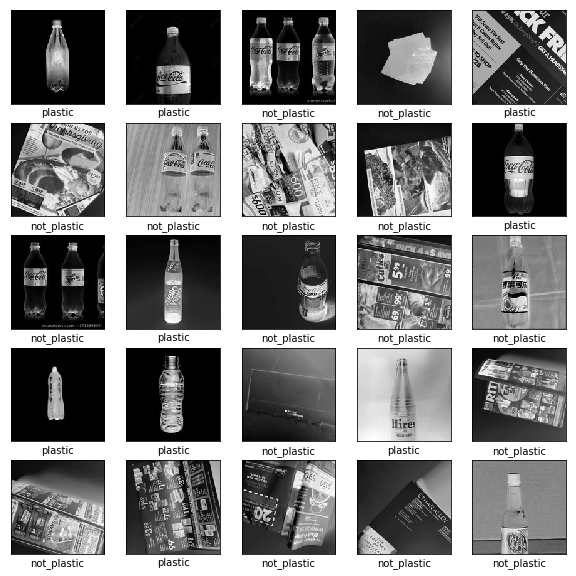

In [21]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()

keep the images you want to classify in 'unknown' folder

(5, 150, 150)
[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [4.1855877e-04 9.9958140e-01]]


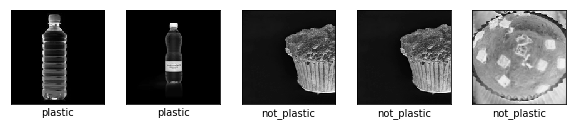

In [23]:
# serialize model to JSON
# model_json = model.to_json()
# with open(rootpath+"\image_classification\model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights(rootpath+"\image_classification\model.h5")
# print("Saved model to disk")



(test_image, label) = load_image_dataset('D:/hackathon/image_classification/unknown', maxsize)
print(test_image.shape)

prediction =model.predict(test_image)
print(prediction)
display_images(test_image, np.argmax(prediction, axis = 1))
plt.show()

 

In [ ]:

os.chdir('D:\hackathon\image_classification')
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

model.save_weights('my_model_weights.h5')
